In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_equity = pd.read_csv('equity_fixedincome.csv')
df_crypto = pd.read_csv('crypto.csv')
df_alt = pd.read_csv('alternative.csv')

In [4]:
df_equity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1259 non-null   object 
 1   USEquity      1259 non-null   float64
 2   Europe        1227 non-null   float64
 3   EmergMarkets  1259 non-null   float64
 4   GovBonds      1237 non-null   float64
 5   CorpBonds     1237 non-null   float64
dtypes: float64(5), object(1)
memory usage: 59.1+ KB


In [5]:
df_equity.isnull().sum()

Date             0
USEquity         0
Europe          32
EmergMarkets     0
GovBonds        22
CorpBonds       22
dtype: int64

In [6]:
df_equity.describe()

,USEquity,Europe,EmergMarkets,GovBonds,CorpBonds
count,1259.000000,1227.000000,1259.000000,1237.000000,1237.000000
mean,287.476886,119.193366,42.129190,192.378553,104.079620
std,55.742060,12.004622,5.464499,9.532308,6.876898
min,186.450000,79.530000,28.860000,171.380000,89.430000
25%,237.010000,111.505000,38.340000,184.040000,98.150000
50%,273.000000,117.150000,40.670000,193.020000,104.860000
75%,335.745000,126.960000,46.335000,200.070000,109.880000
max,399.710000,146.720000,55.540000,213.260000,116.900000


In [7]:
df_crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44448 entries, 0 to 44447
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    44448 non-null  object 
 1   Open    44448 non-null  float64
 2   High    44448 non-null  float64
 3   Low     44448 non-null  float64
 4   Close   44448 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.7+ MB


In [8]:
df_crypto.describe()

,Open,High,Low,Close
count,44448.000000,44448.000000,44448.000000,44448.000000
mean,169.354231,170.293355,168.354748,169.355976
std,140.352655,141.163588,139.494725,140.352451
min,26.440000,26.540000,26.300000,26.430000
25%,64.437500,64.807500,64.097500,64.437500
50%,93.480000,94.185000,92.670000,93.480000
75%,276.260000,278.807500,273.622500,276.260000
max,571.960000,575.000000,570.430000,571.950000


In [9]:
df_alt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1260 non-null   object 
 1   Commodities  1260 non-null   float64
 2   RealEstate   1260 non-null   float64
dtypes: float64(2), object(1)
memory usage: 29.7+ KB


In [10]:
df_alt.describe()

,Commodities,RealEstate
count,1260.000000,1260.000000
mean,10.041944,23.278302
std,1.540983,2.910269
min,7.350000,14.500000
25%,8.300000,21.010000
50%,10.660000,23.115000
75%,11.312500,25.385000
max,12.820000,29.710000


In [11]:
df_equity['Date'] = pd.to_datetime(df_equity['Date'])

In [12]:

# Convert 'Time' column to datetime
df_crypto['Time'] = pd.to_datetime(df_crypto['Time']) 
# Localize the timezone to 'US/Eastern', handling nonexistent and ambiguous times
df_crypto['Time'] = df_crypto['Time'].dt.tz_localize(
    'US/Eastern', 
    nonexistent='shift_forward',  # Shift non-existent times forward
    ambiguous=True              # Treat ambiguous times as the first occurrence (during DST)
) 


# Set 'Time' as the index
df_crypto.set_index('Time', inplace=True)

In [13]:
df_crypto.head()



,Open,High,Low,Close
Time,,,,
2018-01-01 01:00:00-05:00,114.30,114.30,111.67,112.74
2018-01-01 02:00:00-05:00,112.74,113.30,109.63,110.03
2018-01-01 03:00:00-05:00,110.02,111.82,110.00,111.08
2018-01-01 04:00:00-05:00,111.09,113.43,110.75,111.75
2018-01-01 05:00:00-05:00,111.96,113.53,111.02,113.34


In [14]:
df_alt['Date']=df_alt['Date'].str.replace('Date: ','')

In [15]:
df_alt.head()

,Date,Commodities,RealEstate
0,2018-01-02,8.21,21.24
1,2018-01-03,8.23,21.27
2,2018-01-04,8.25,20.97
3,2018-01-05,8.25,21.02
4,2018-01-08,8.24,21.05


In [16]:
df_alt['Date']=pd.to_datetime(df_alt['Date'])

In [17]:
df_equity.set_index('Date',inplace=True)


In [18]:
df_alt.set_index('Date',inplace=True)

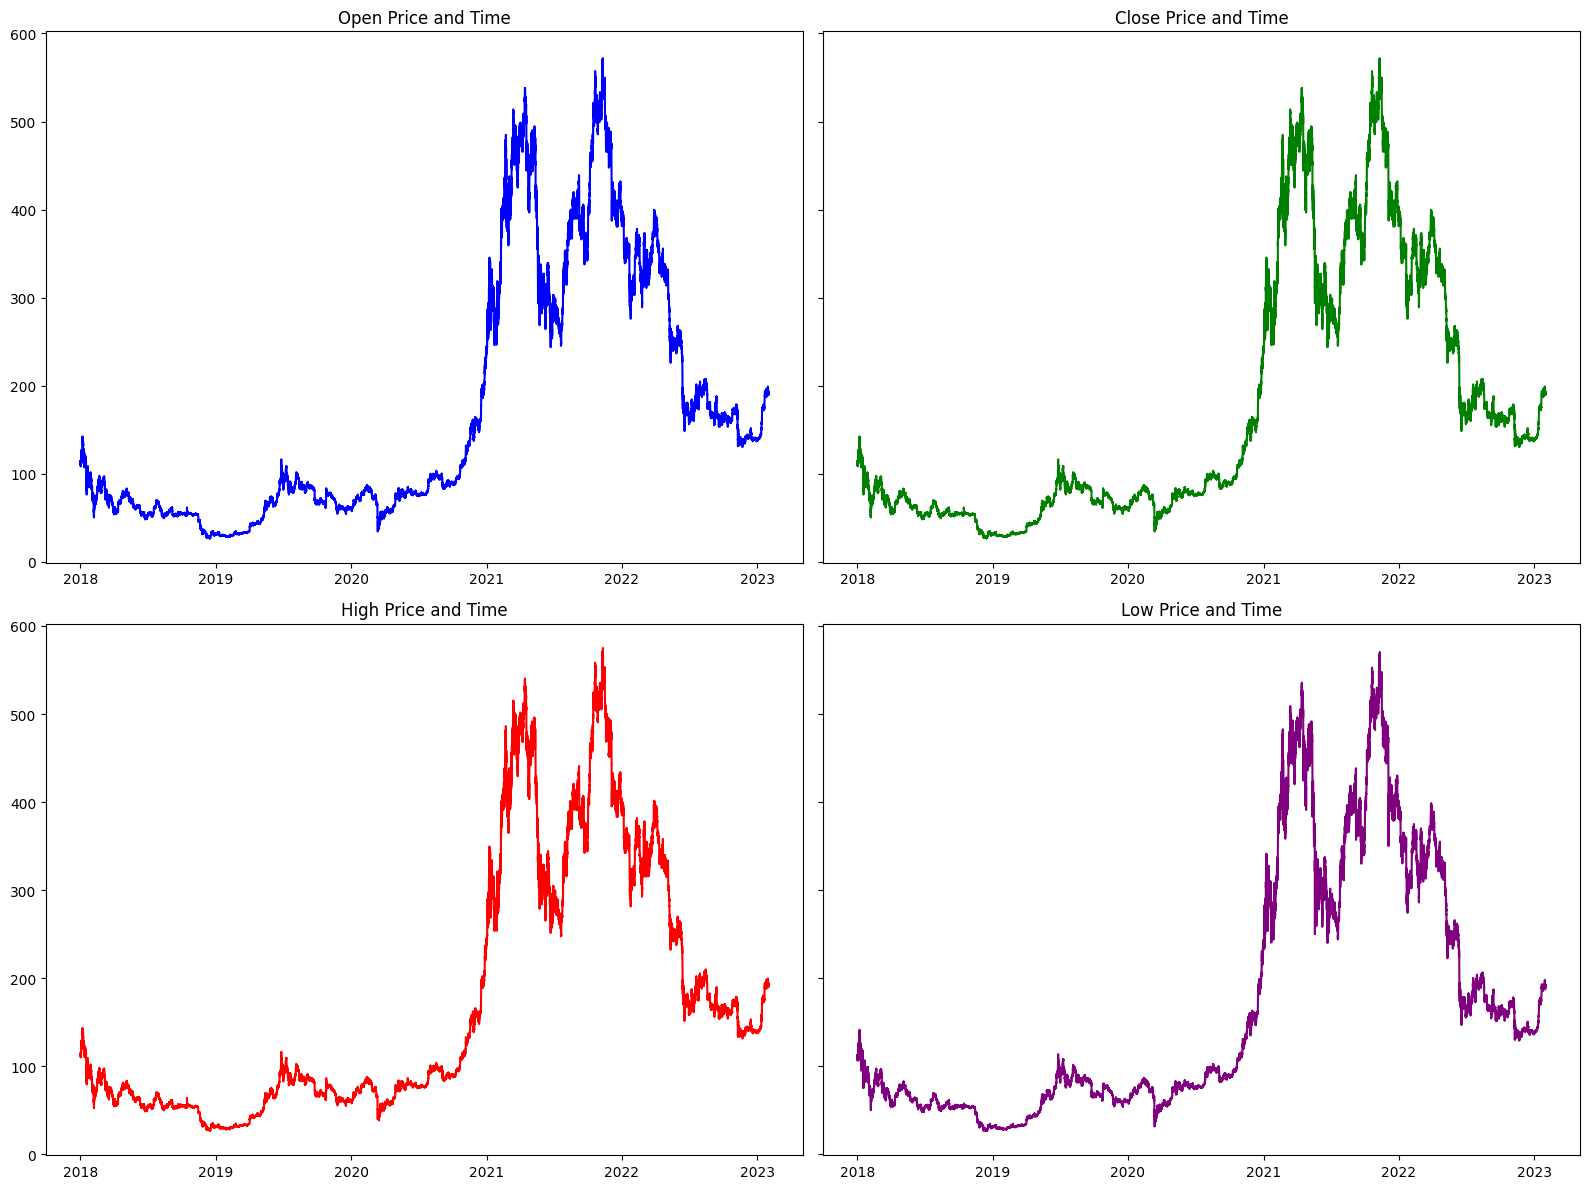

In [19]:
# Create a 2x2 grid of subplots
fig, ax = plt.subplots(2, 2, sharey=True, figsize=(16,12))

# Plot Open prices
ax[0, 0].plot(df_crypto.index, df_crypto['Open'], color='blue')
ax[0, 0].set_title('Open Price and Time')

# Plot Close prices
ax[0, 1].plot(df_crypto.index, df_crypto['Close'], color='green')
ax[0, 1].set_title('Close Price and Time')

# Plot High prices
ax[1, 0].plot(df_crypto.index, df_crypto['High'], color='red')
ax[1, 0].set_title('High Price and Time')

# Plot Low prices
ax[1, 1].plot(df_crypto.index, df_crypto['Low'], color='purple')
ax[1, 1].set_title('Low Price and Time')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

<Axes: xlabel='Date'>

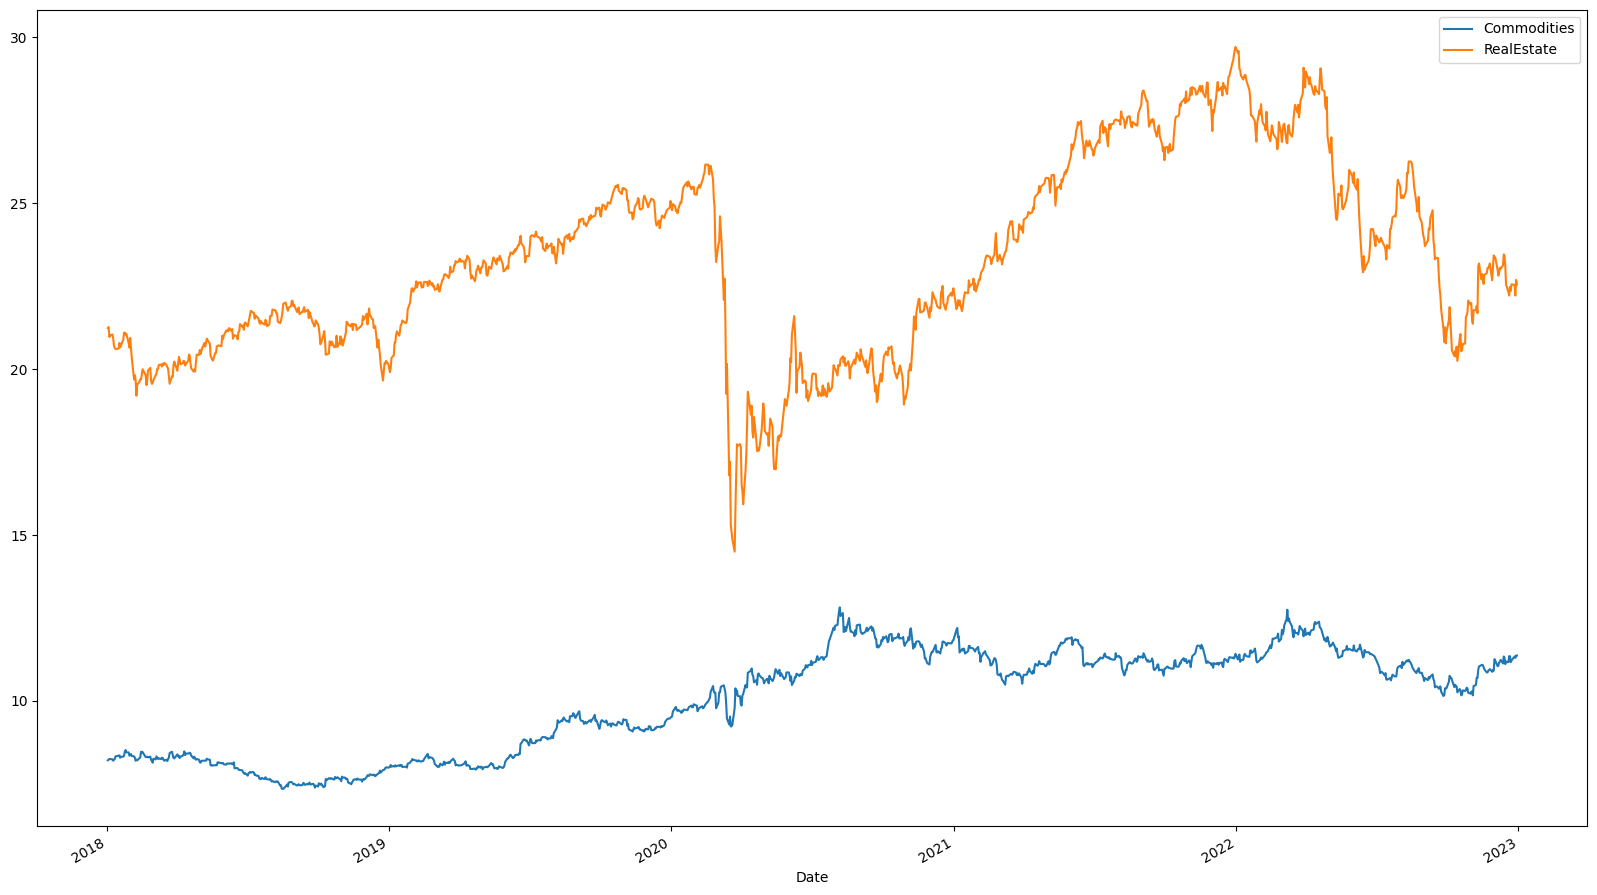

In [20]:
df_alt.plot(figsize=(20,12))

<Axes: xlabel='Date'>

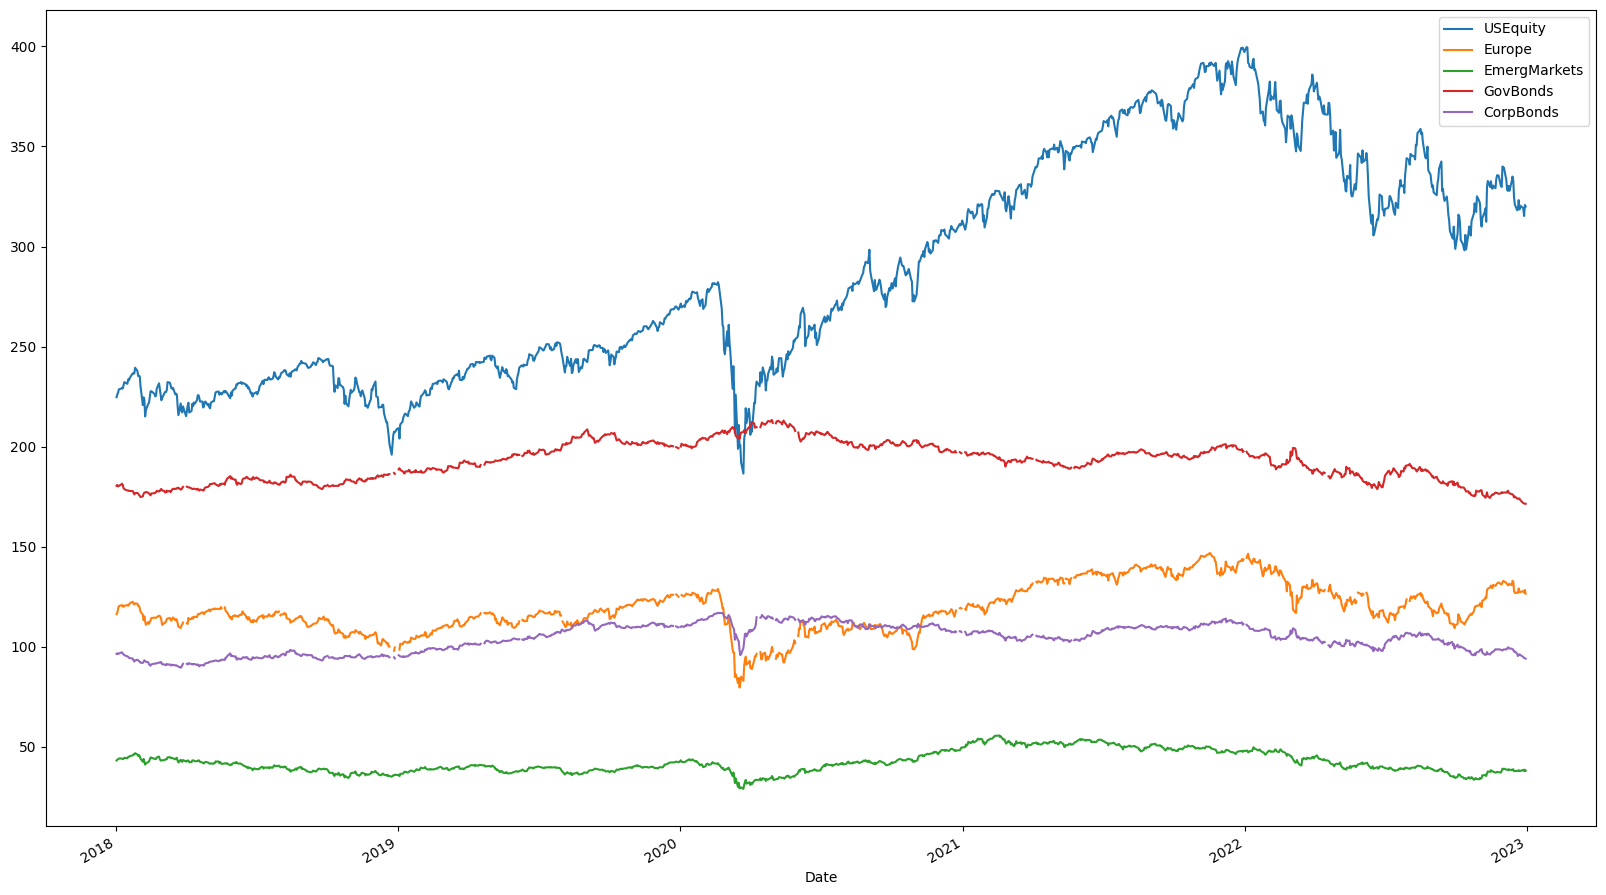

In [21]:
df_equity.plot(figsize=(20,12) )

In [22]:
df_equity.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2018-01-02 to 2022-12-30
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USEquity      1259 non-null   float64
 1   Europe        1227 non-null   float64
 2   EmergMarkets  1259 non-null   float64
 3   GovBonds      1237 non-null   float64
 4   CorpBonds     1237 non-null   float64
dtypes: float64(5)
memory usage: 59.0 KB


In [23]:
df_equity[df_equity['Europe'].isnull()]

,USEquity,Europe,EmergMarkets,GovBonds,CorpBonds
Date,,,,,
2018-04-02,215.16,NaN,42.52,NaN,NaN
2018-05-01,221.23,NaN,41.87,NaN,NaN
2018-05-10,226.92,NaN,42.58,181.17,93.07
2018-05-21,227.75,NaN,41.57,181.43,93.44
2018-08-01,234.45,NaN,40.13,180.90,95.08
2018-12-24,195.93,NaN,34.96,NaN,NaN
2018-12-26,205.64,NaN,35.66,NaN,NaN
2018-12-31,208.90,NaN,35.79,NaN,NaN
2019-01-02,209.17,NaN,35.88,188.61,95.68


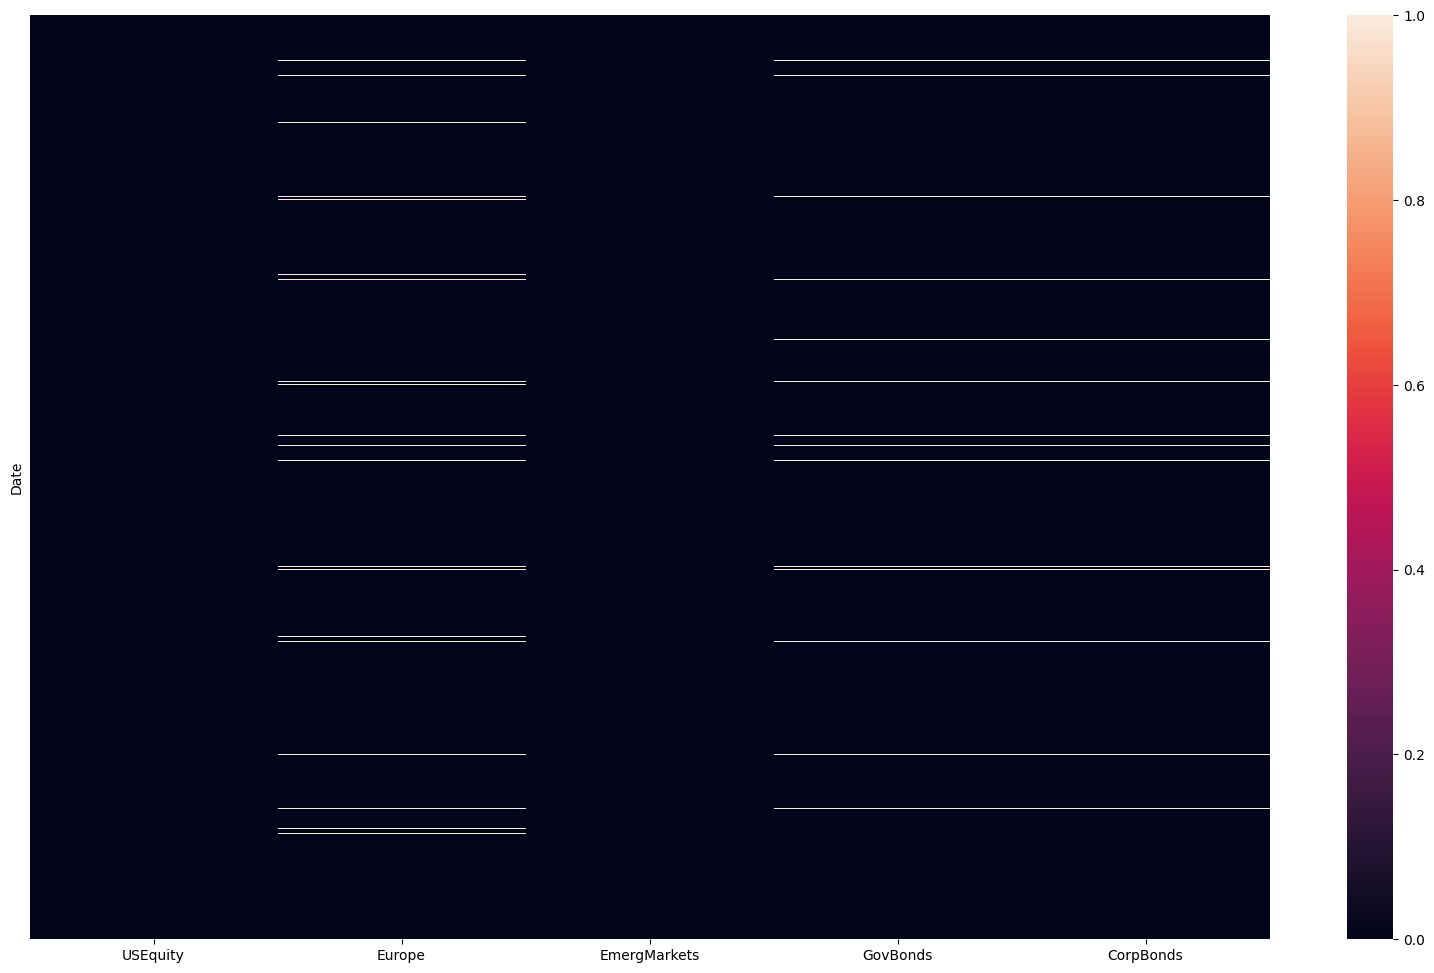

In [24]:
plt.figure(figsize=(20,12))
sns.heatmap(df_equity.isna(),yticklabels=False)
plt.show()

In [25]:
df_equity.ffill(inplace=True)

In [26]:
df_equity.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2018-01-02 to 2022-12-30
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USEquity      1259 non-null   float64
 1   Europe        1259 non-null   float64
 2   EmergMarkets  1259 non-null   float64
 3   GovBonds      1259 non-null   float64
 4   CorpBonds     1259 non-null   float64
dtypes: float64(5)
memory usage: 59.0 KB


In [27]:
df_crypto.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44448 entries, 2018-01-01 01:00:00-05:00 to 2023-02-01 01:00:00-05:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    44448 non-null  float64
 1   High    44448 non-null  float64
 2   Low     44448 non-null  float64
 3   Close   44448 non-null  float64
dtypes: float64(4)
memory usage: 1.7 MB


In [28]:


# Now you can resample by day
df_crypto = df_crypto.resample(rule='D').last()
 

In [29]:
df_alt.index = df_alt.index.date
df_equity.index = df_equity.index.date
df_crypto.index = df_crypto.index.date
df_crypto.index.name='Date'

In [30]:
df_crypto

,Open,High,Low,Close
Date,,,,
2018-01-01,112.46,113.33,112.09,112.10
2018-01-02,122.50,125.21,122.38,123.33
2018-01-03,124.39,124.58,123.33,123.33
2018-01-04,123.32,124.82,121.68,124.49
2018-01-05,140.00,142.07,138.71,141.84
...,...,...,...,...
2023-01-28,191.68,191.80,191.44,191.48
2023-01-29,198.29,198.51,197.67,198.05
2023-01-30,189.54,189.73,187.50,189.42


In [31]:
df_ny_trad = pd.concat([df_equity, df_alt, df_crypto], axis='columns')
df_ny_trad.index.name = 'Date'
# Convert the index to a DatetimeIndex if necessary
df_ny_trad.index = pd.to_datetime(df_ny_trad.index)
df_ny_trad

,USEquity,Europe,EmergMarkets,GovBonds,CorpBonds,Commodities,RealEstate,Open,High,Low,Close
Date,,,,,,,,,,,
2018-01-02,224.65,116.23,43.05,180.38,96.37,8.21,21.24,122.50,125.21,122.38,123.33
2018-01-03,226.09,117.00,43.47,180.80,96.63,8.23,21.27,124.39,124.58,123.33,123.33
2018-01-04,227.00,118.96,43.68,180.11,96.32,8.25,20.97,123.32,124.82,121.68,124.49
2018-01-05,228.60,120.25,44.06,180.30,96.54,8.25,21.02,140.00,142.07,138.71,141.84
2018-01-08,228.98,120.55,44.06,181.04,97.01,8.24,21.05,124.08,124.33,120.67,121.50
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,191.68,191.80,191.44,191.48
2023-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198.29,198.51,197.67,198.05
2023-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.54,189.73,187.50,189.42


In [32]:
df_ny_trad[~df_ny_trad.USEquity.isnull()]


,USEquity,Europe,EmergMarkets,GovBonds,CorpBonds,Commodities,RealEstate,Open,High,Low,Close
Date,,,,,,,,,,,
2018-01-02,224.65,116.23,43.05,180.38,96.37,8.21,21.24,122.50,125.21,122.38,123.33
2018-01-03,226.09,117.00,43.47,180.80,96.63,8.23,21.27,124.39,124.58,123.33,123.33
2018-01-04,227.00,118.96,43.68,180.11,96.32,8.25,20.97,123.32,124.82,121.68,124.49
2018-01-05,228.60,120.25,44.06,180.30,96.54,8.25,21.02,140.00,142.07,138.71,141.84
2018-01-08,228.98,120.55,44.06,181.04,97.01,8.24,21.05,124.08,124.33,120.67,121.50
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,320.40,127.23,37.80,173.26,95.83,11.22,22.56,140.10,140.10,139.71,139.94
2022-12-27,319.10,127.76,38.36,171.70,94.77,11.34,22.54,139.19,139.24,139.05,139.09
2022-12-28,315.27,126.96,37.80,171.52,94.26,11.30,22.22,137.73,137.85,137.30,137.65


In [33]:
df_ny_trad.isnull().sum()


USEquity        599
Europe          599
EmergMarkets    599
GovBonds        599
CorpBonds       599
Commodities     598
RealEstate      598
Open              0
High              0
Low               0
Close             0
dtype: int64

In [34]:
df_ny_trad.dropna(inplace=True)

In [35]:
df_ny_trad

,USEquity,Europe,EmergMarkets,GovBonds,CorpBonds,Commodities,RealEstate,Open,High,Low,Close
Date,,,,,,,,,,,
2018-01-02,224.65,116.23,43.05,180.38,96.37,8.21,21.24,122.50,125.21,122.38,123.33
2018-01-03,226.09,117.00,43.47,180.80,96.63,8.23,21.27,124.39,124.58,123.33,123.33
2018-01-04,227.00,118.96,43.68,180.11,96.32,8.25,20.97,123.32,124.82,121.68,124.49
2018-01-05,228.60,120.25,44.06,180.30,96.54,8.25,21.02,140.00,142.07,138.71,141.84
2018-01-08,228.98,120.55,44.06,181.04,97.01,8.24,21.05,124.08,124.33,120.67,121.50
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,320.40,127.23,37.80,173.26,95.83,11.22,22.56,140.10,140.10,139.71,139.94
2022-12-27,319.10,127.76,38.36,171.70,94.77,11.34,22.54,139.19,139.24,139.05,139.09
2022-12-28,315.27,126.96,37.80,171.52,94.26,11.30,22.22,137.73,137.85,137.30,137.65


In [36]:
df_ny_trad.drop(columns=['Open','High','Low'], inplace=True)
df_ny_trad.rename(columns={'Close':'Crypto'}, inplace=True)
df_ny_trad

,USEquity,Europe,EmergMarkets,GovBonds,CorpBonds,Commodities,RealEstate,Crypto
Date,,,,,,,,
2018-01-02,224.65,116.23,43.05,180.38,96.37,8.21,21.24,123.33
2018-01-03,226.09,117.00,43.47,180.80,96.63,8.23,21.27,123.33
2018-01-04,227.00,118.96,43.68,180.11,96.32,8.25,20.97,124.49
2018-01-05,228.60,120.25,44.06,180.30,96.54,8.25,21.02,141.84
2018-01-08,228.98,120.55,44.06,181.04,97.01,8.24,21.05,121.50
...,...,...,...,...,...,...,...,...
2022-12-23,320.40,127.23,37.80,173.26,95.83,11.22,22.56,139.94
2022-12-27,319.10,127.76,38.36,171.70,94.77,11.34,22.54,139.09
2022-12-28,315.27,126.96,37.80,171.52,94.26,11.30,22.22,137.65


<Axes: xlabel='Date'>

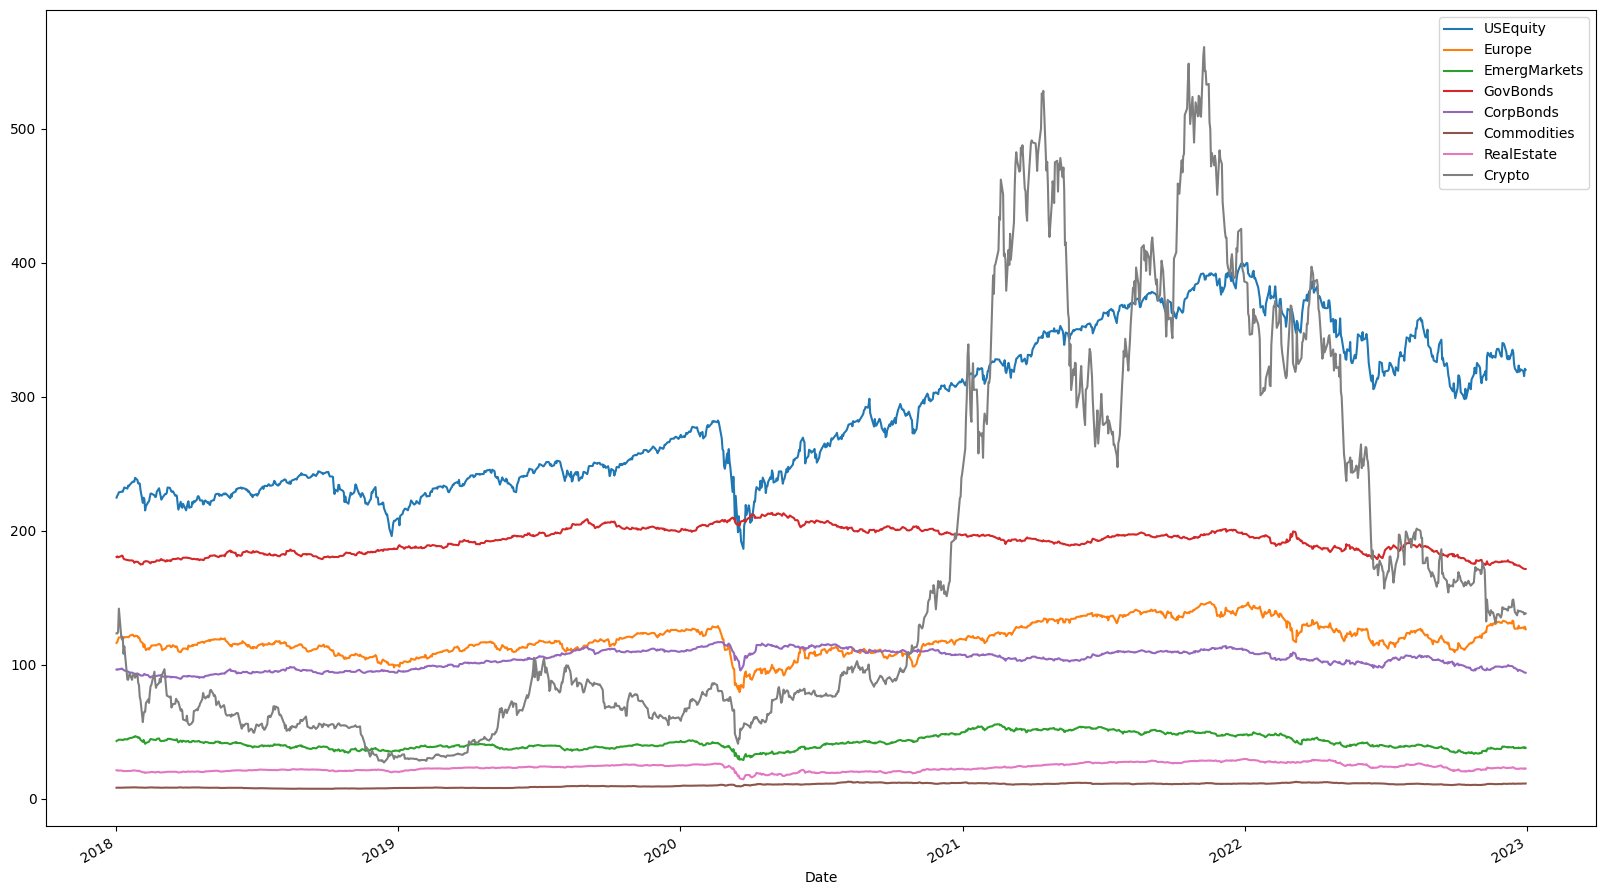

In [37]:
df_ny_trad.plot(figsize=(20,12))

### Normalized chart with base date 2018-01-02 and base rate 100

In [38]:
base_date='2018-01-02'
base_rate = 100

In [39]:
df_normalized  = df_ny_trad/df_ny_trad.loc[base_date]*base_rate
df_normalized

,USEquity,Europe,EmergMarkets,GovBonds,CorpBonds,Commodities,RealEstate,Crypto
Date,,,,,,,,
2018-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2018-01-03,100.640997,100.662480,100.975610,100.232842,100.269794,100.243605,100.141243,100.000000
2018-01-04,101.046072,102.348791,101.463415,99.850316,99.948117,100.487211,98.728814,100.940566
2018-01-05,101.758291,103.458660,102.346109,99.955649,100.176403,100.487211,98.964218,115.008514
2018-01-08,101.927443,103.716768,102.346109,100.365894,100.664107,100.365408,99.105461,98.516176
...,...,...,...,...,...,...,...,...
2022-12-23,142.621856,109.463994,87.804878,96.052777,99.439660,136.662607,106.214689,113.467932
2022-12-27,142.043178,109.919986,89.105691,95.187937,98.339732,138.124239,106.120527,112.778724
2022-12-28,140.338304,109.231696,87.804878,95.088147,97.810522,137.637028,104.613936,111.611125


Create a price chart (figsize: (12, 8) with normalized prices for all eight Asset Classes.

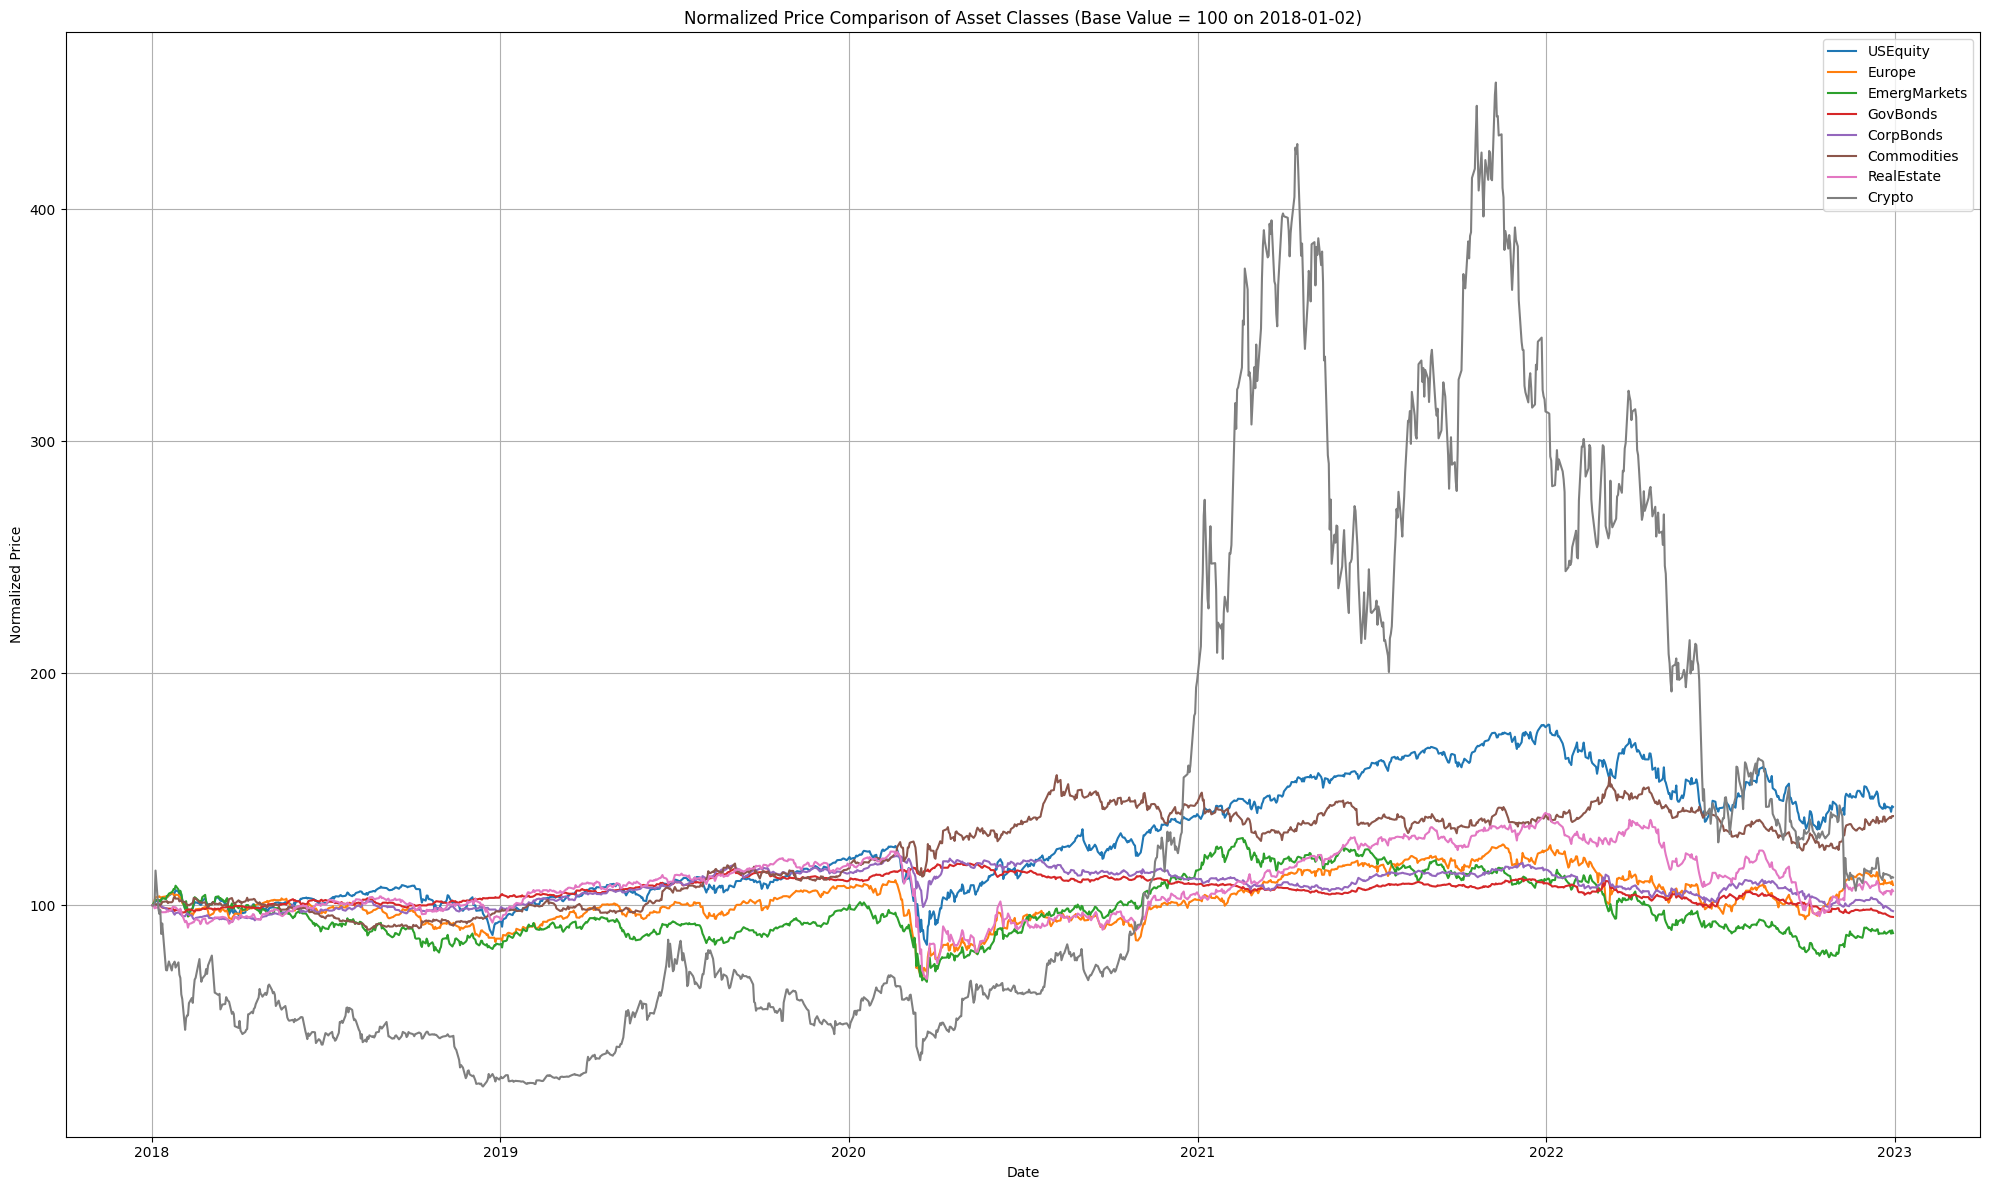

In [40]:
plt.figure(figsize=(20,12))
for column in df_normalized.columns:
    plt.plot(df_normalized.index, df_normalized[column], label=column)
plt.title('Normalized Price Comparison of Asset Classes (Base Value = 100 on 2018-01-02)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


 Visually compare the Equity Sub-Asset Classes (USEquity, Europe, EmergMarkets) in the pre-Covid 19 period from the beginning of 2018 until mid of January 2020 (2020-01-15) with a normalized price chart

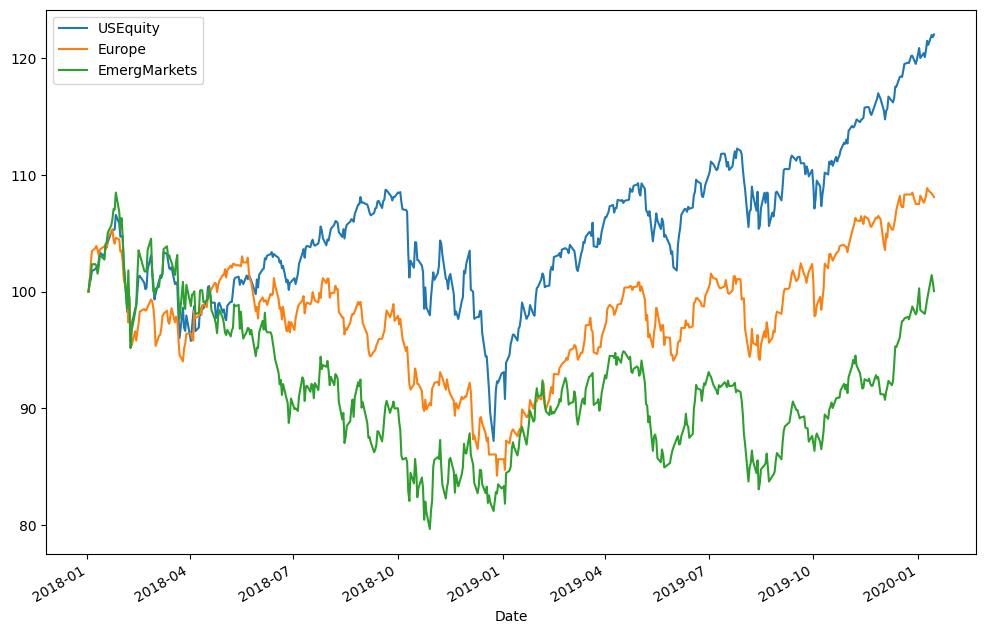

In [41]:
df_normalized.loc["2018":"2020-01-15", ["USEquity", "Europe", "EmergMarkets"]].plot(figsize = (12, 8))
plt.show()

#### Calculate and visualize Price Percentage Changes (Financial Returns)

In [42]:
df_return = df_ny_trad.pct_change(1).dropna()
df_return

,USEquity,Europe,EmergMarkets,GovBonds,CorpBonds,Commodities,RealEstate,Crypto
Date,,,,,,,,
2018-01-03,0.006410,0.006625,0.009756,0.002328,0.002698,0.002436,0.001412,0.000000
2018-01-04,0.004025,0.016752,0.004831,-0.003816,-0.003208,0.002430,-0.014104,0.009406
2018-01-05,0.007048,0.010844,0.008700,0.001055,0.002284,0.000000,0.002384,0.139369
2018-01-08,0.001662,0.002495,0.000000,0.004104,0.004868,-0.001212,0.001427,-0.143401
2018-01-09,0.001266,0.001742,-0.001589,0.001989,0.001237,-0.004854,-0.005701,-0.022305
...,...,...,...,...,...,...,...,...
2022-12-23,0.005871,-0.001648,-0.001321,-0.004196,-0.003224,0.004476,0.008945,-0.000357
2022-12-27,-0.004057,0.004166,0.014815,-0.009004,-0.011061,0.010695,-0.000887,-0.006074
2022-12-28,-0.012003,-0.006262,-0.014599,-0.001048,-0.005381,-0.003527,-0.014197,-0.010353


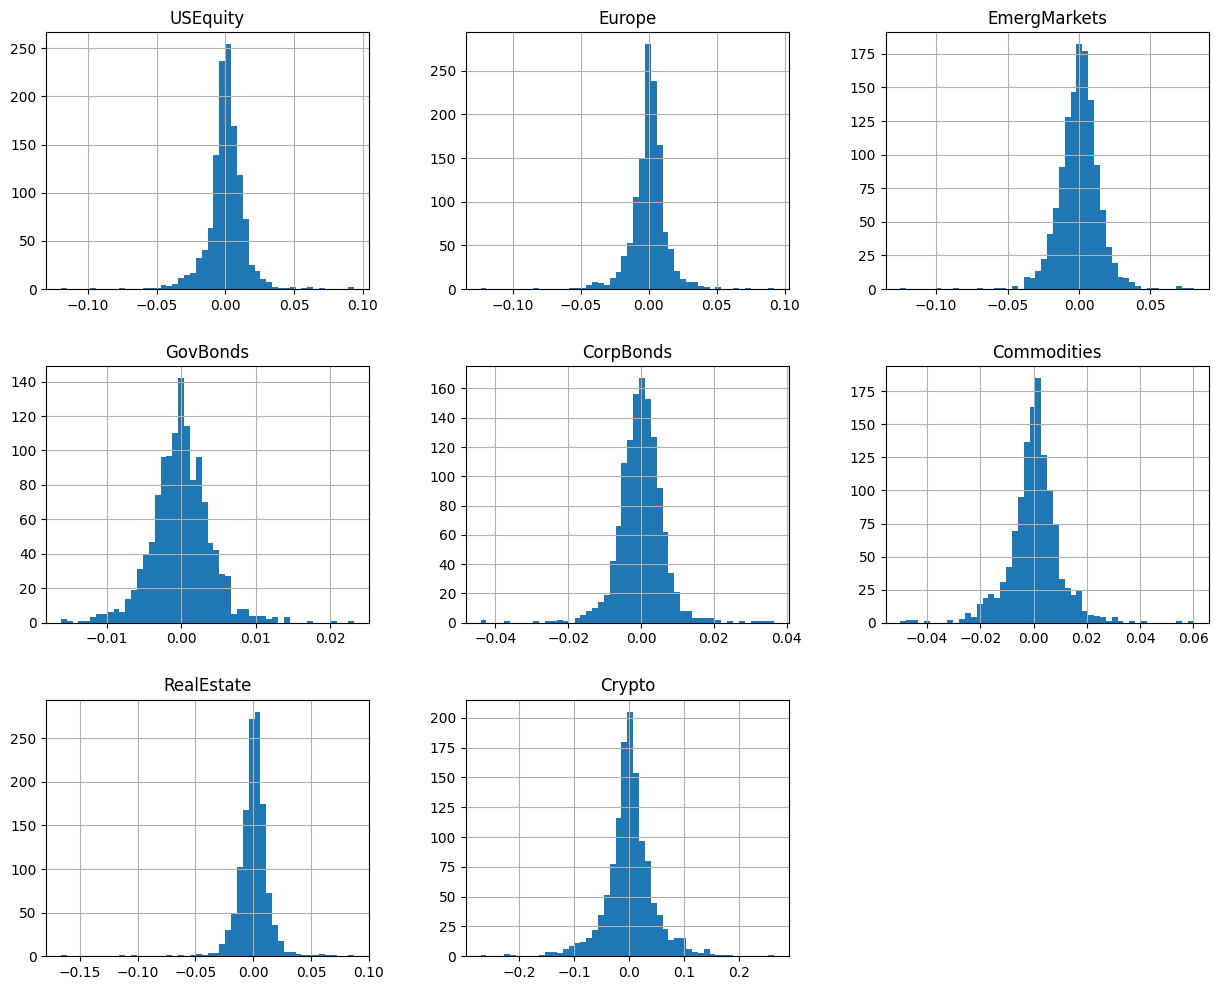

In [43]:
df_return.hist(figsize=(15,12),bins=50)
plt.show()

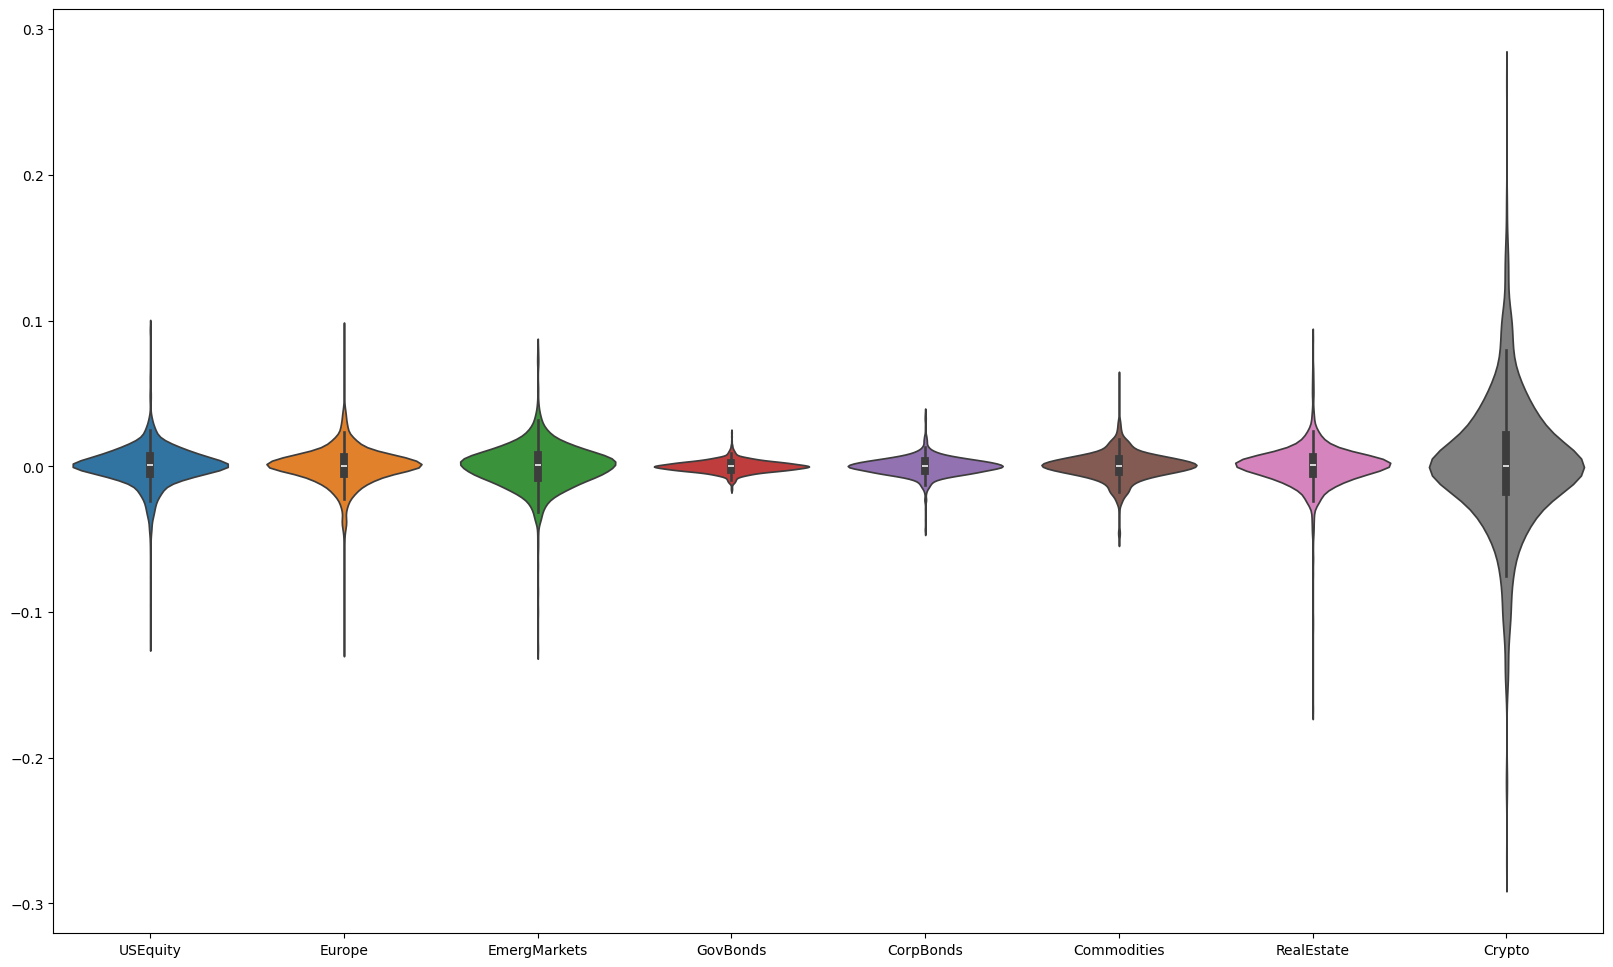

In [44]:
plt.figure(figsize=(20,12))
sns.violinplot(data=df_return)
plt.show()

#### Calculate and visualize Financial Risk and Return


In [45]:
annual_trading_days = 252
df_annualized_return = df_return.mean() * annual_trading_days
df_annualized_return



USEquity        0.094881
Europe          0.038807
EmergMarkets    0.001788
GovBonds       -0.008253
CorpBonds       0.000034
Commodities     0.076906
RealEstate      0.037597
Crypto          0.282852
dtype: float64

In [46]:
df_std = df_return.std()
df_std

USEquity        0.013776
Europe          0.013151
EmergMarkets    0.014672
GovBonds        0.003987
CorpBonds       0.006339
Commodities     0.009624
RealEstate      0.014126
Crypto          0.045198
dtype: float64

In [47]:
df_annualized_risk = df_std * np.sqrt(252)
df_annualized_risk

USEquity        0.218690
Europe          0.208758
EmergMarkets    0.232909
GovBonds        0.063288
CorpBonds       0.100622
Commodities     0.152774
RealEstate      0.224237
Crypto          0.717495
dtype: float64

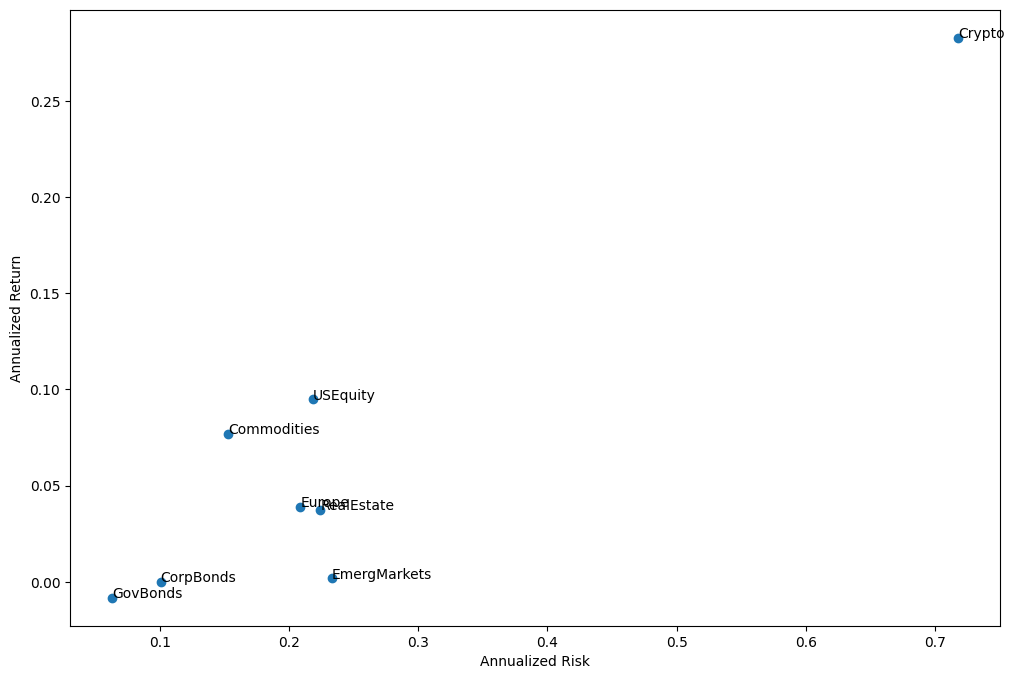

In [48]:
plt.figure(figsize=(12,8))
plt.scatter(x=df_annualized_risk, y=df_annualized_return)
for i in df_annualized_risk.index:
    plt.annotate(i, xy=(df_annualized_risk[i], df_annualized_return[i]), size = 10)

plt. xlabel('Annualized Risk')
plt.ylabel('Annualized Return')
plt.show()


#### Calculate and visualize pairwise correlations


In [49]:
df_correllation = df_ny_trad.corr()
df_correllation

,USEquity,Europe,EmergMarkets,GovBonds,CorpBonds,Commodities,RealEstate,Crypto
USEquity,1.000000,0.821635,0.650786,0.045707,0.384774,0.783955,0.767661,0.883617
Europe,0.821635,1.000000,0.725199,-0.103856,0.205790,0.419655,0.866598,0.776680
EmergMarkets,0.650786,0.725199,1.000000,0.050426,0.219577,0.470188,0.542851,0.767538
GovBonds,0.045707,-0.103856,0.050426,1.000000,0.902216,0.367063,0.072869,0.048649
CorpBonds,0.384774,0.205790,0.219577,0.902216,1.000000,0.612261,0.323913,0.281490
Commodities,0.783955,0.419655,0.470188,0.367063,0.612261,1.000000,0.370553,0.636507
RealEstate,0.767661,0.866598,0.542851,0.072869,0.323913,0.370553,1.000000,0.698387
Crypto,0.883617,0.776680,0.767538,0.048649,0.281490,0.636507,0.698387,1.000000


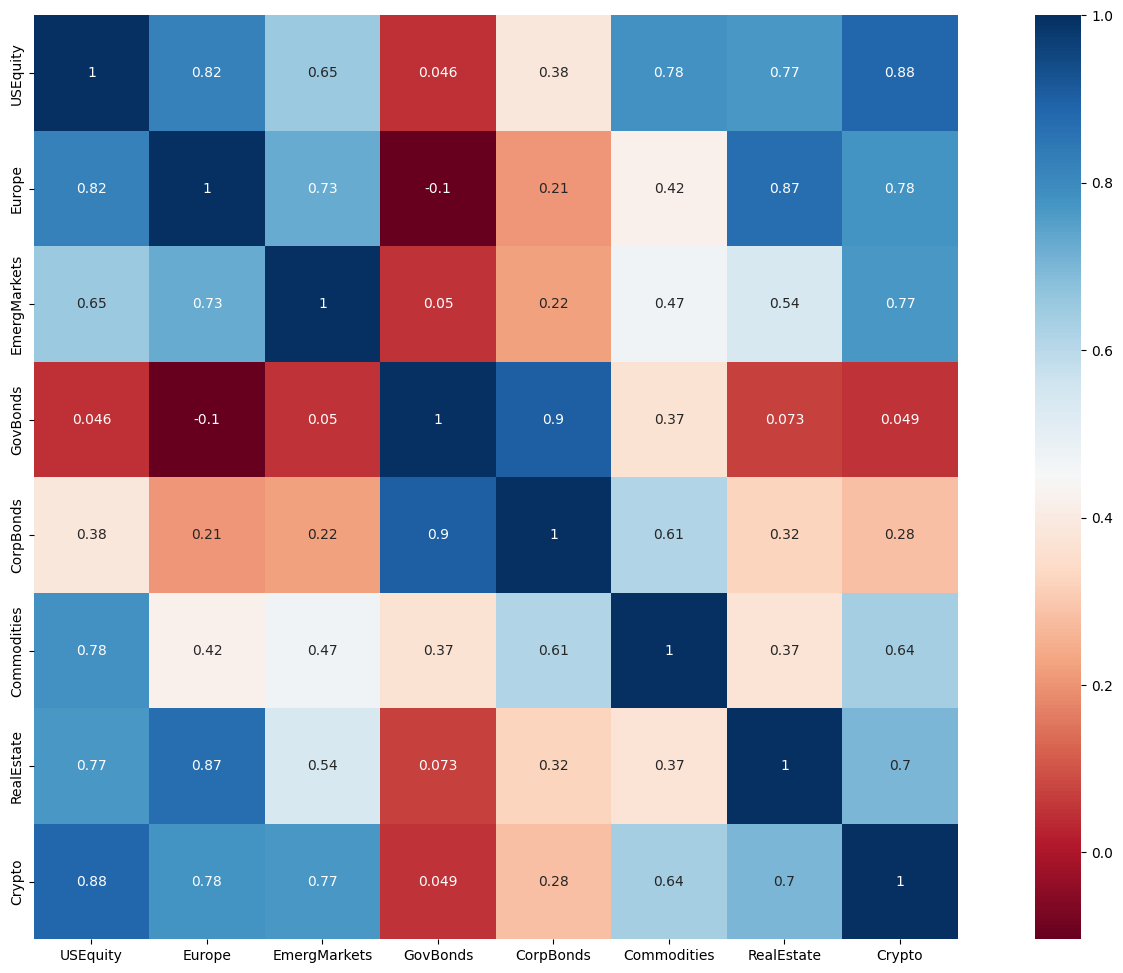

In [50]:
plt.figure(figsize=(20,12))
sns.heatmap(df_correllation, square = True, annot = True, cmap = "RdBu")
plt.show()

In [51]:
df_return_correlation = df_return.corr()
df_return_correlation

,USEquity,Europe,EmergMarkets,GovBonds,CorpBonds,Commodities,RealEstate,Crypto
USEquity,1.000000,0.605900,0.784037,-0.133767,0.224511,0.090180,0.776982,0.264227
Europe,0.605900,1.000000,0.611035,-0.231723,0.165318,0.043852,0.565589,0.211470
EmergMarkets,0.784037,0.611035,1.000000,-0.208248,0.115967,0.151436,0.632364,0.251855
GovBonds,-0.133767,-0.231723,-0.208248,1.000000,0.673031,0.055231,-0.052151,-0.025975
CorpBonds,0.224511,0.165318,0.115967,0.673031,1.000000,0.039007,0.288000,0.030417
Commodities,0.090180,0.043852,0.151436,0.055231,0.039007,1.000000,0.151105,0.128553
RealEstate,0.776982,0.565589,0.632364,-0.052151,0.288000,0.151105,1.000000,0.214260
Crypto,0.264227,0.211470,0.251855,-0.025975,0.030417,0.128553,0.214260,1.000000


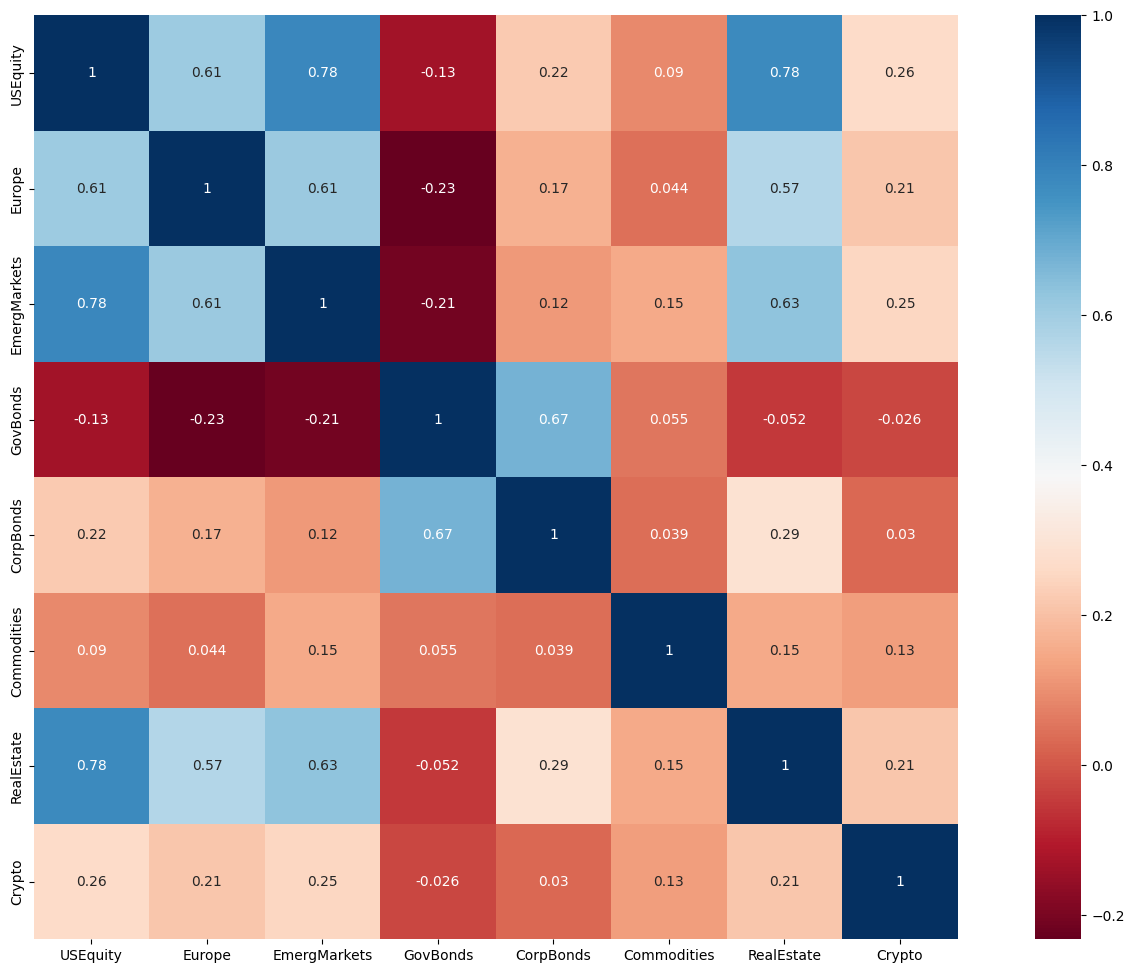

In [52]:

plt.figure(figsize=(20,12))
sns.heatmap(df_return_correlation, square = True, annot = True, cmap = "RdBu")
plt.show()